In [44]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import numpy as np 
import matplotlib.pyplot as plt 

import jax 
import jax_cosmo as jc
import jax.numpy as jnp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Cosmology 
cosmo_jax = jc.Cosmology(Omega_c=0.3, Omega_b=0.05, h=0.7, sigma8 = 0.8, n_s=0.96,
         Omega_k=0., w0=-1., wa=0.)

In [117]:
# Redshift range
zmin = 0.0
zmax = 4
zstep = 1024
zvec = np.linspace(zmin, zmax, zstep)

# Smail Parameters
a_smail= 1.
b_smail = 2.
z0_smail = 1.

# Scale factor 
a = 1 / (1+zvec)

# Ell range 
ell_range = np.arange(1, 1e3)
ell_value_test = 10

In [118]:
# Redshift distribution 
nz = jc.redshift.smail_nz(a_smail, b_smail, z0_smail)

# Tracers 
velocity_tracer = jc.probes.PeculiarVelocity([nz])

# Cells - with Limber approximation
velocity_cell = jc.angular_cl.angular_cl(cosmo_jax, ell_range, [velocity_tracer])

/Users/joaopedrobonifacio/anaconda3/envs/firecrown_developer/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:733: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


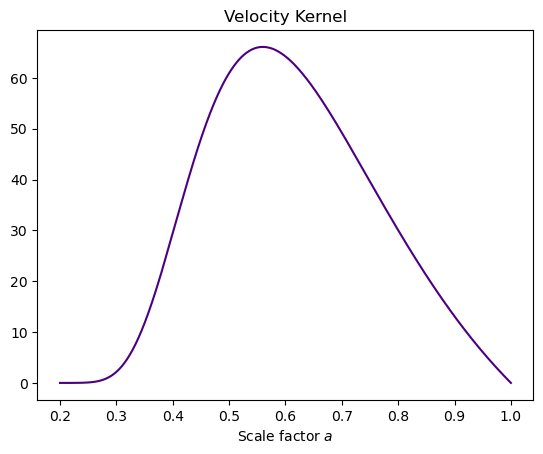

In [119]:
# Velocity Kernel Plot - Withot the operations inside angular_cl.py 
plt.title('Velocity Kernel')
plt.plot(a, velocity_tracer.kernel(cosmo_jax, zvec, ell_range)[0], ls='-', color='indigo')
plt.xlabel('Scale factor $a$');

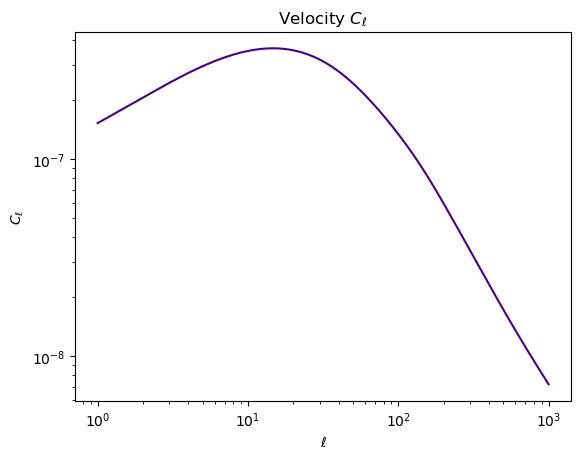

In [121]:
# Cell plot 
plt.title('Velocity $C_{\ell}$')
plt.plot(ell_range, velocity_cell[0], ls='-', color='indigo')
plt.loglog()
plt.xlabel('$\ell$')
plt.ylabel('$C_{\ell}$');